### Handle the missing data of given dataset.

In [1]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: D:\01_june_data_science\02_broadway\Data_science_19thApril\projects\hr.csv

  0%|          | 0.00/580k [00:00<?, ?B/s]
 90%|######### | 524k/580k [00:00<00:00, 578kB/s]
100%|##########| 580k/580k [00:00<00:00, 639kB/s]


In [36]:
# Importing necessary tools for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./data/hr.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

In [5]:
df.salary.value_counts()

low       7289
medium    6449
high      1237
Name: salary, dtype: int64

### Since age column has missing datas more than 70% it is better to drop the entire column.

In [6]:
df.drop('age', axis=1, inplace=True)

In [7]:
df.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department                0
salary                   29
dtype: int64

### Since the dataframe consists of duplicates values we are creating a new df with droping duplicated values.

In [10]:
new_df = df.drop_duplicates()

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12006 non-null  float64
 1   last_evaluation        12006 non-null  float64
 2   number_project         12006 non-null  int64  
 3   average_montly_hours   12006 non-null  int64  
 4   time_spend_company     12006 non-null  int64  
 5   Work_accident          12006 non-null  int64  
 6   left                   12006 non-null  object 
 7   promotion_last_5years  12006 non-null  int64  
 8   Department             12006 non-null  object 
 9   salary                 11977 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


In [21]:
# By looking on the info of the df, we can say that we have three categorical columns.
categorical_columns = ['left', 'Department', 'salary']

In [13]:
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,IT,low
1,0.40,0.49,2,155,3,0,1,0,hr,medium
2,0.45,0.45,2,154,3,1,1,0,support,medium
3,0.46,0.73,6,256,4,0,0,0,product_mng,high
4,0.14,0.54,5,275,4,1,0,0,sales,high


In [16]:
new_df.left.value_counts()

0    10006
1     1996
?        4
Name: left, dtype: int64

In [18]:
new_df[new_df['left'] == '?']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7864,0.72,0.67,5,210,2,0,?,0,management,medium
8309,0.96,0.54,3,198,3,0,?,0,support,low
10830,0.55,0.96,3,194,3,0,?,0,product_mng,medium
12652,0.96,0.75,4,177,2,0,?,0,IT,low


In [53]:
# Since the frequence of 0 values is very high in dataframe. The left column is converted
# Applying the condition where left value with 1 is converted into numeric 1 and others in 0.
new_df["left"] = np.where(new_df["left"] == "1", 1, 0)

C:\Users\Raju\AppData\Local\Temp\ipykernel_2024\2415544446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["left"] = np.where(new_df["left"] == "1", 1, 0)


In [54]:
new_df.left.value_counts()

0    10010
1     1996
Name: left, dtype: int64

In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12006 non-null  float64
 1   last_evaluation        12006 non-null  float64
 2   number_project         12006 non-null  int64  
 3   average_montly_hours   12006 non-null  int64  
 4   time_spend_company     12006 non-null  int64  
 5   Work_accident          12006 non-null  int64  
 6   left                   12006 non-null  int32  
 7   promotion_last_5years  12006 non-null  int64  
 8   Department             12006 non-null  object 
 9   salary                 11977 non-null  object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 1.2+ MB


### Converted left values into numeric form.

In [26]:
new_df.Department.value_counts()

sales          3241
technical      2244
support        1826
IT              979
RandD           695
product_mng     688
marketing       673
accounting      621
hr              601
management      438
Name: Department, dtype: int64

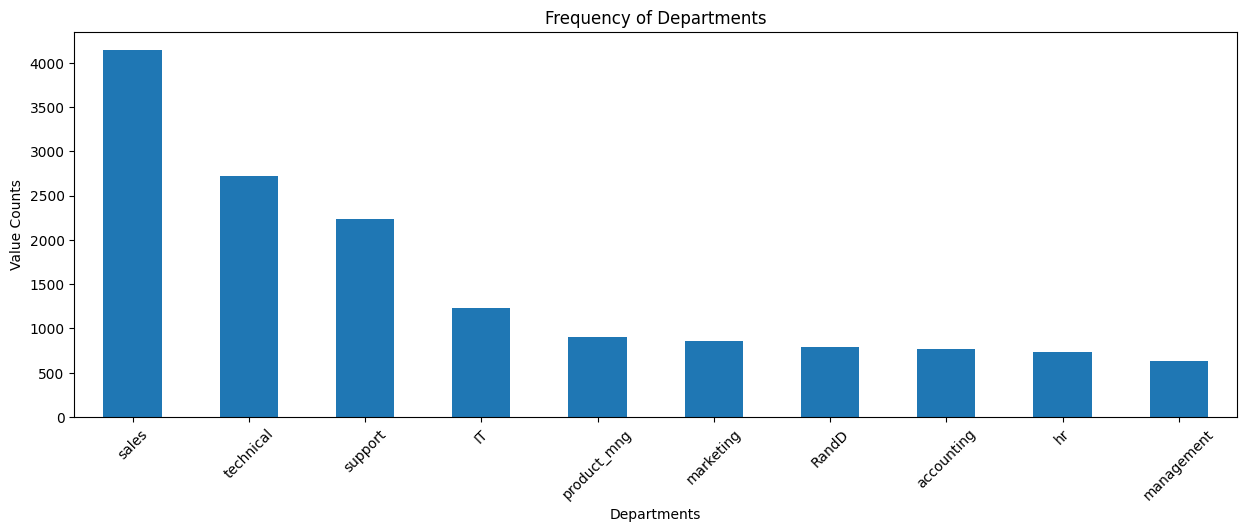

In [23]:
plt.figure(figsize=(15, 5))
df['Department'].value_counts().plot(kind='bar')
plt.xlabel('Departments')
plt.xticks(rotation=45)
plt.ylabel('Value Counts')
plt.title('Frequency of Departments');

### Converting the deparment column values into numeric form.

In [131]:
encoded_df = pd.get_dummies(data = new_df, columns=['Department'], dtype=int)
encoded_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.24,0.79,2,175,5,0,0,0,low,1,0,0,0,0,0,0,0,0,0
1,0.40,0.49,2,155,3,0,1,0,medium,0,0,0,1,0,0,0,0,0,0
2,0.45,0.45,2,154,3,1,1,0,medium,0,0,0,0,0,0,0,0,1,0
3,0.46,0.73,6,256,4,0,0,0,high,0,0,0,0,0,0,1,0,0,0
4,0.14,0.54,5,275,4,1,0,0,high,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14998,0.95,0.65,5,182,3,0,0,0,low,0,0,0,0,0,1,0,0,0,0
15000,0.75,0.84,3,145,3,1,0,0,low,0,0,0,0,0,0,0,0,1,0
15001,0.32,0.41,3,138,3,1,0,0,medium,0,0,0,0,0,0,0,0,0,1
15002,0.62,0.58,3,148,2,1,0,0,low,0,0,0,0,0,0,0,0,0,1


In [132]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 0 to 15003
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      12006 non-null  float64
 1   last_evaluation         12006 non-null  float64
 2   number_project          12006 non-null  int64  
 3   average_montly_hours    12006 non-null  int64  
 4   time_spend_company      12006 non-null  int64  
 5   Work_accident           12006 non-null  int64  
 6   left                    12006 non-null  int32  
 7   promotion_last_5years   12006 non-null  int64  
 8   salary                  11977 non-null  object 
 9   Department_IT           12006 non-null  int32  
 10  Department_RandD        12006 non-null  int32  
 11  Department_accounting   12006 non-null  int32  
 12  Department_hr           12006 non-null  int32  
 13  Department_management   12006 non-null  int32  
 14  Department_marketing    12006 non-null

In [133]:
new_df.salary.value_counts()

low       5724
medium    5263
high       990
Name: salary, dtype: int64

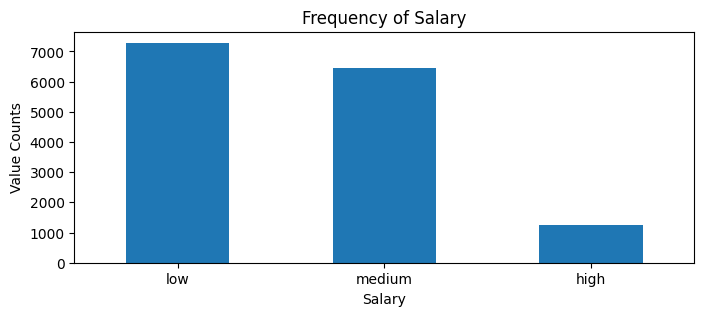

In [134]:
plt.figure(figsize=(8, 3))
df['salary'].value_counts().plot(kind='bar')
plt.xlabel('Salary')
plt.xticks(rotation=0)
plt.ylabel('Value Counts')
plt.title('Frequency of Salary');

## Preparing data for the model.

In [135]:
def category_salary_number(salary):
    if salary == 'low':
        return 1
    elif salary == 'medium':
        return 2
    elif salary == 'high':
        return 3
    else:
        return 0

In [136]:
encoded_df['salary'] = encoded_df['salary'].apply(category_salary_number)

In [137]:
encoded_df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
14998,0.95,0.65,5,182,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0
15000,0.75,0.84,3,145,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0
15001,0.32,0.41,3,138,3,1,0,0,2,0,0,0,0,0,0,0,0,0,1
15002,0.62,0.58,3,148,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1
15003,0.81,0.94,3,225,4,0,0,0,2,0,0,0,1,0,0,0,0,0,0


In [138]:
encoded_df.salary.value_counts()

1    5724
2    5263
3     990
0      29
Name: salary, dtype: int64

In [139]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 0 to 15003
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      12006 non-null  float64
 1   last_evaluation         12006 non-null  float64
 2   number_project          12006 non-null  int64  
 3   average_montly_hours    12006 non-null  int64  
 4   time_spend_company      12006 non-null  int64  
 5   Work_accident           12006 non-null  int64  
 6   left                    12006 non-null  int32  
 7   promotion_last_5years   12006 non-null  int64  
 8   salary                  12006 non-null  int64  
 9   Department_IT           12006 non-null  int32  
 10  Department_RandD        12006 non-null  int32  
 11  Department_accounting   12006 non-null  int32  
 12  Department_hr           12006 non-null  int32  
 13  Department_management   12006 non-null  int32  
 14  Department_marketing    12006 non-null

In [140]:
X = encoded_df.drop('salary', axis=1)
y = encoded_df['salary']

In [141]:
y.head()

0    1
1    2
2    2
3    3
4    3
Name: salary, dtype: int64

In [142]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 0 to 15003
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      12006 non-null  float64
 1   last_evaluation         12006 non-null  float64
 2   number_project          12006 non-null  int64  
 3   average_montly_hours    12006 non-null  int64  
 4   time_spend_company      12006 non-null  int64  
 5   Work_accident           12006 non-null  int64  
 6   left                    12006 non-null  int32  
 7   promotion_last_5years   12006 non-null  int64  
 8   salary                  12006 non-null  int64  
 9   Department_IT           12006 non-null  int32  
 10  Department_RandD        12006 non-null  int32  
 11  Department_accounting   12006 non-null  int32  
 12  Department_hr           12006 non-null  int32  
 13  Department_management   12006 non-null  int32  
 14  Department_marketing    12006 non-null